## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#data view options
pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)
# pd.set_option('display.width',None)

# 1. Data Loading and Analysis

### Importing the data

In [2]:
leads_df = pd.read_csv('./Leads.csv')
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
leads_df.shape,leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

((9240, 37), None)

# 2. Data Cleaning & PreProcessing

In [4]:
# dropping unwanted id columns as they do not consist of any features
leads_df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

### As said in the data dictionary the value select in Column "Specialization" is as meaningful as NaN. Hence replacing it with NaN
### Columns "How did you hear about X Education","Lead Profile","City" also have a value  "Select". Applying the same

In [5]:
leads_df = leads_df.replace({'Specialization':{'Select':np.NaN}
                             ,'How did you hear about X Education':{'Select':np.NaN}
                             ,'Lead Profile':{'Select':np.NaN},'City':{'Select':np.NaN}
                            })

In [6]:
df_nulls =leads_df.isna().mean().sort_values(ascending=False).reset_index()
df_nulls[0] = df_nulls[0]*100
print(f'{df_nulls[df_nulls[0]>0].shape[0]} NULL values rows are existing in DataFrame' )

17 NULL values rows are existing in DataFrame


In [7]:
#Listting all the null values in descending order
df_nulls = leads_df.isna().mean().sort_values(ascending=False).reset_index()
df_nulls[0] = df_nulls[0]*100
df_nulls[df_nulls[0]>0]

index          0
0              How did you hear about X Education  78.463203
1                                    Lead Profile  74.188312
2                                    Lead Quality  51.590909
3                     Asymmetrique Activity Score  45.649351
4                      Asymmetrique Profile Score  45.649351
5                      Asymmetrique Profile Index  45.649351
6                     Asymmetrique Activity Index  45.649351
7                                            City  39.707792
8                                  Specialization  36.580087
9                                            Tags  36.287879
10  What matters most to you in choosing a course  29.318182
11                What is your current occupation  29.112554
12                                        Country  26.634199
13                                    TotalVisits   1.482684
14                           Page Views Per Visit   1.482684
15                                  Last Activity   1.114719
16                                    Lead Source   0.389610

### Dropping the columns which have more than 40% of null values

In [8]:
# df.drop(unwanted_columns,axis=1,inplace=True)getting unwanted columns and DROPPING
cutoff = 40
df_unwanted_columns = df_nulls[df_nulls[0]>=cutoff]['index'].values.tolist()
leads_df.drop(df_unwanted_columns,axis=1,inplace=True)

In [9]:
df_nulls = leads_df.isna().mean().sort_values(ascending=False).reset_index()
df_nulls[0] = df_nulls[0]*100
print(f'{df_nulls[df_nulls[0]>0].shape[0]} NULL values rows are remaining in DataFrame' )

10 NULL values rows are remaining in DataFrame


### Separating the category and numerical variables

In [10]:
numeric_columns = leads_df.select_dtypes(include = [np.number]).columns
categorical_columns= leads_df.select_dtypes(exclude = [np.number]).columns

### Imputing the numerical values of leads_df for null values with Median

In [11]:
leads_df[numeric_columns].describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [12]:
for col in numeric_columns:
    leads_df.loc[leads_df[col].isna(),col]=leads_df[col].median()

In [13]:
#Listting all the null values in descending order
df_nulls = leads_df.isna().mean().sort_values(ascending=False).reset_index()
df_nulls[0] = df_nulls[0]*100
df_nulls[df_nulls[0]>0]

index          0
0                                           City  39.707792
1                                 Specialization  36.580087
2                                           Tags  36.287879
3  What matters most to you in choosing a course  29.318182
4                What is your current occupation  29.112554
5                                        Country  26.634199
6                                  Last Activity   1.114719
7                                    Lead Source   0.389610

In [14]:
# checking data distribution for remaining categorical columns
for i in categorical_columns:
        perc=100*leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("--"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

-------------------------------------------------------------------------------- 

value_counts % for : Lead Source 

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM

### Dropping the variables which have mode larger than 95%(highly skewed data) as it have minimal effect on target variable

In [15]:
leads_df.drop(columns=['Do Not Call','Country',
                       'What matters most to you in choosing a course','Search',
                       'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
                       ,'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'
                       ,'Get updates on DM Content','I agree to pay the amount through cheque'
                      ],inplace=True)

### Grouping low frequency values to Others

In [16]:
leadsouce_frequency = pd.DataFrame(leads_df['Lead Source'].value_counts(normalize=True))
leadsouce_low_frequency_values = leadsouce_frequency[(leadsouce_frequency['Lead Source']*100)<4].index.values
# replacing
leads_df['Lead Source'].replace(leadsouce_low_frequency_values, 'Others', inplace=True)

lastactivity_frequency = pd.DataFrame(leads_df['Last Activity'].value_counts(normalize=True))
lastactivity_low_frequency_values = lastactivity_frequency[(lastactivity_frequency['Last Activity']*100)<4].index.values
# replacing
leads_df['Last Activity'].replace(lastactivity_low_frequency_values, 'Others', inplace=True)

specialization_frequency = pd.DataFrame(leads_df['Specialization'].value_counts(normalize=True))
specialization_low_frequency_values = specialization_frequency[(specialization_frequency['Specialization']*100)<4].index.values
# replacing
leads_df['Specialization'].replace(specialization_low_frequency_values, 'Others', inplace=True)

tags_frequency = pd.DataFrame(leads_df['Tags'].value_counts(normalize=True))
tags_low_frequency_values = tags_frequency[(tags_frequency['Tags']*100)<4].index.values
# replacing
leads_df['Tags'].replace(tags_low_frequency_values, 'Others', inplace=True)

notable_activity_frequency = pd.DataFrame(leads_df['Last Notable Activity'].value_counts(normalize=True))
notable_activity_low_frequency_values = notable_activity_frequency[(notable_activity_frequency['Last Notable Activity']*100)<4].index.values
# replacing
leads_df['Last Notable Activity'].replace(notable_activity_low_frequency_values, 'Others', inplace=True)

In [17]:
#Listting all the null values in descending order
df_nulls = leads_df.isna().mean().sort_values(ascending=False).reset_index()
df_nulls[0] = df_nulls[0]*100
df_nulls[df_nulls[0]>0]

index          0
0                             City  39.707792
1                   Specialization  36.580087
2                             Tags  36.287879
3  What is your current occupation  29.112554
4                    Last Activity   1.114719
5                      Lead Source   0.389610

### Imputing the columns

In [18]:
missing_values={
#     imputing different values for missing values > 30%
    'City':'NA','Specialization':'NA','Tags':'NA',
#     imputing mode for missing values < 30%
    'What is your current occupation':'Unemployed',
    'Last Activity':'Email Opened','Lead Source':'Google'
               }
leads_df=leads_df.fillna(value=missing_values)

In [19]:
df_nulls = leads_df.isna().mean().sort_values(ascending=False).reset_index()
df_nulls[0] = df_nulls[0]*100
print(f'{df_nulls[df_nulls[0]>0].shape[0]} NULL values rows are remaining in DataFrame' )

0 NULL values rows are remaining in DataFrame


In [20]:
numeric_columns = leads_df.select_dtypes(include = [np.number]).columns
categorical_columns= leads_df.select_dtypes(exclude = [np.number]).columns

# 3. EDA - Exploratory Data Analysis

In [21]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

### univariate analysis on Categorical variables

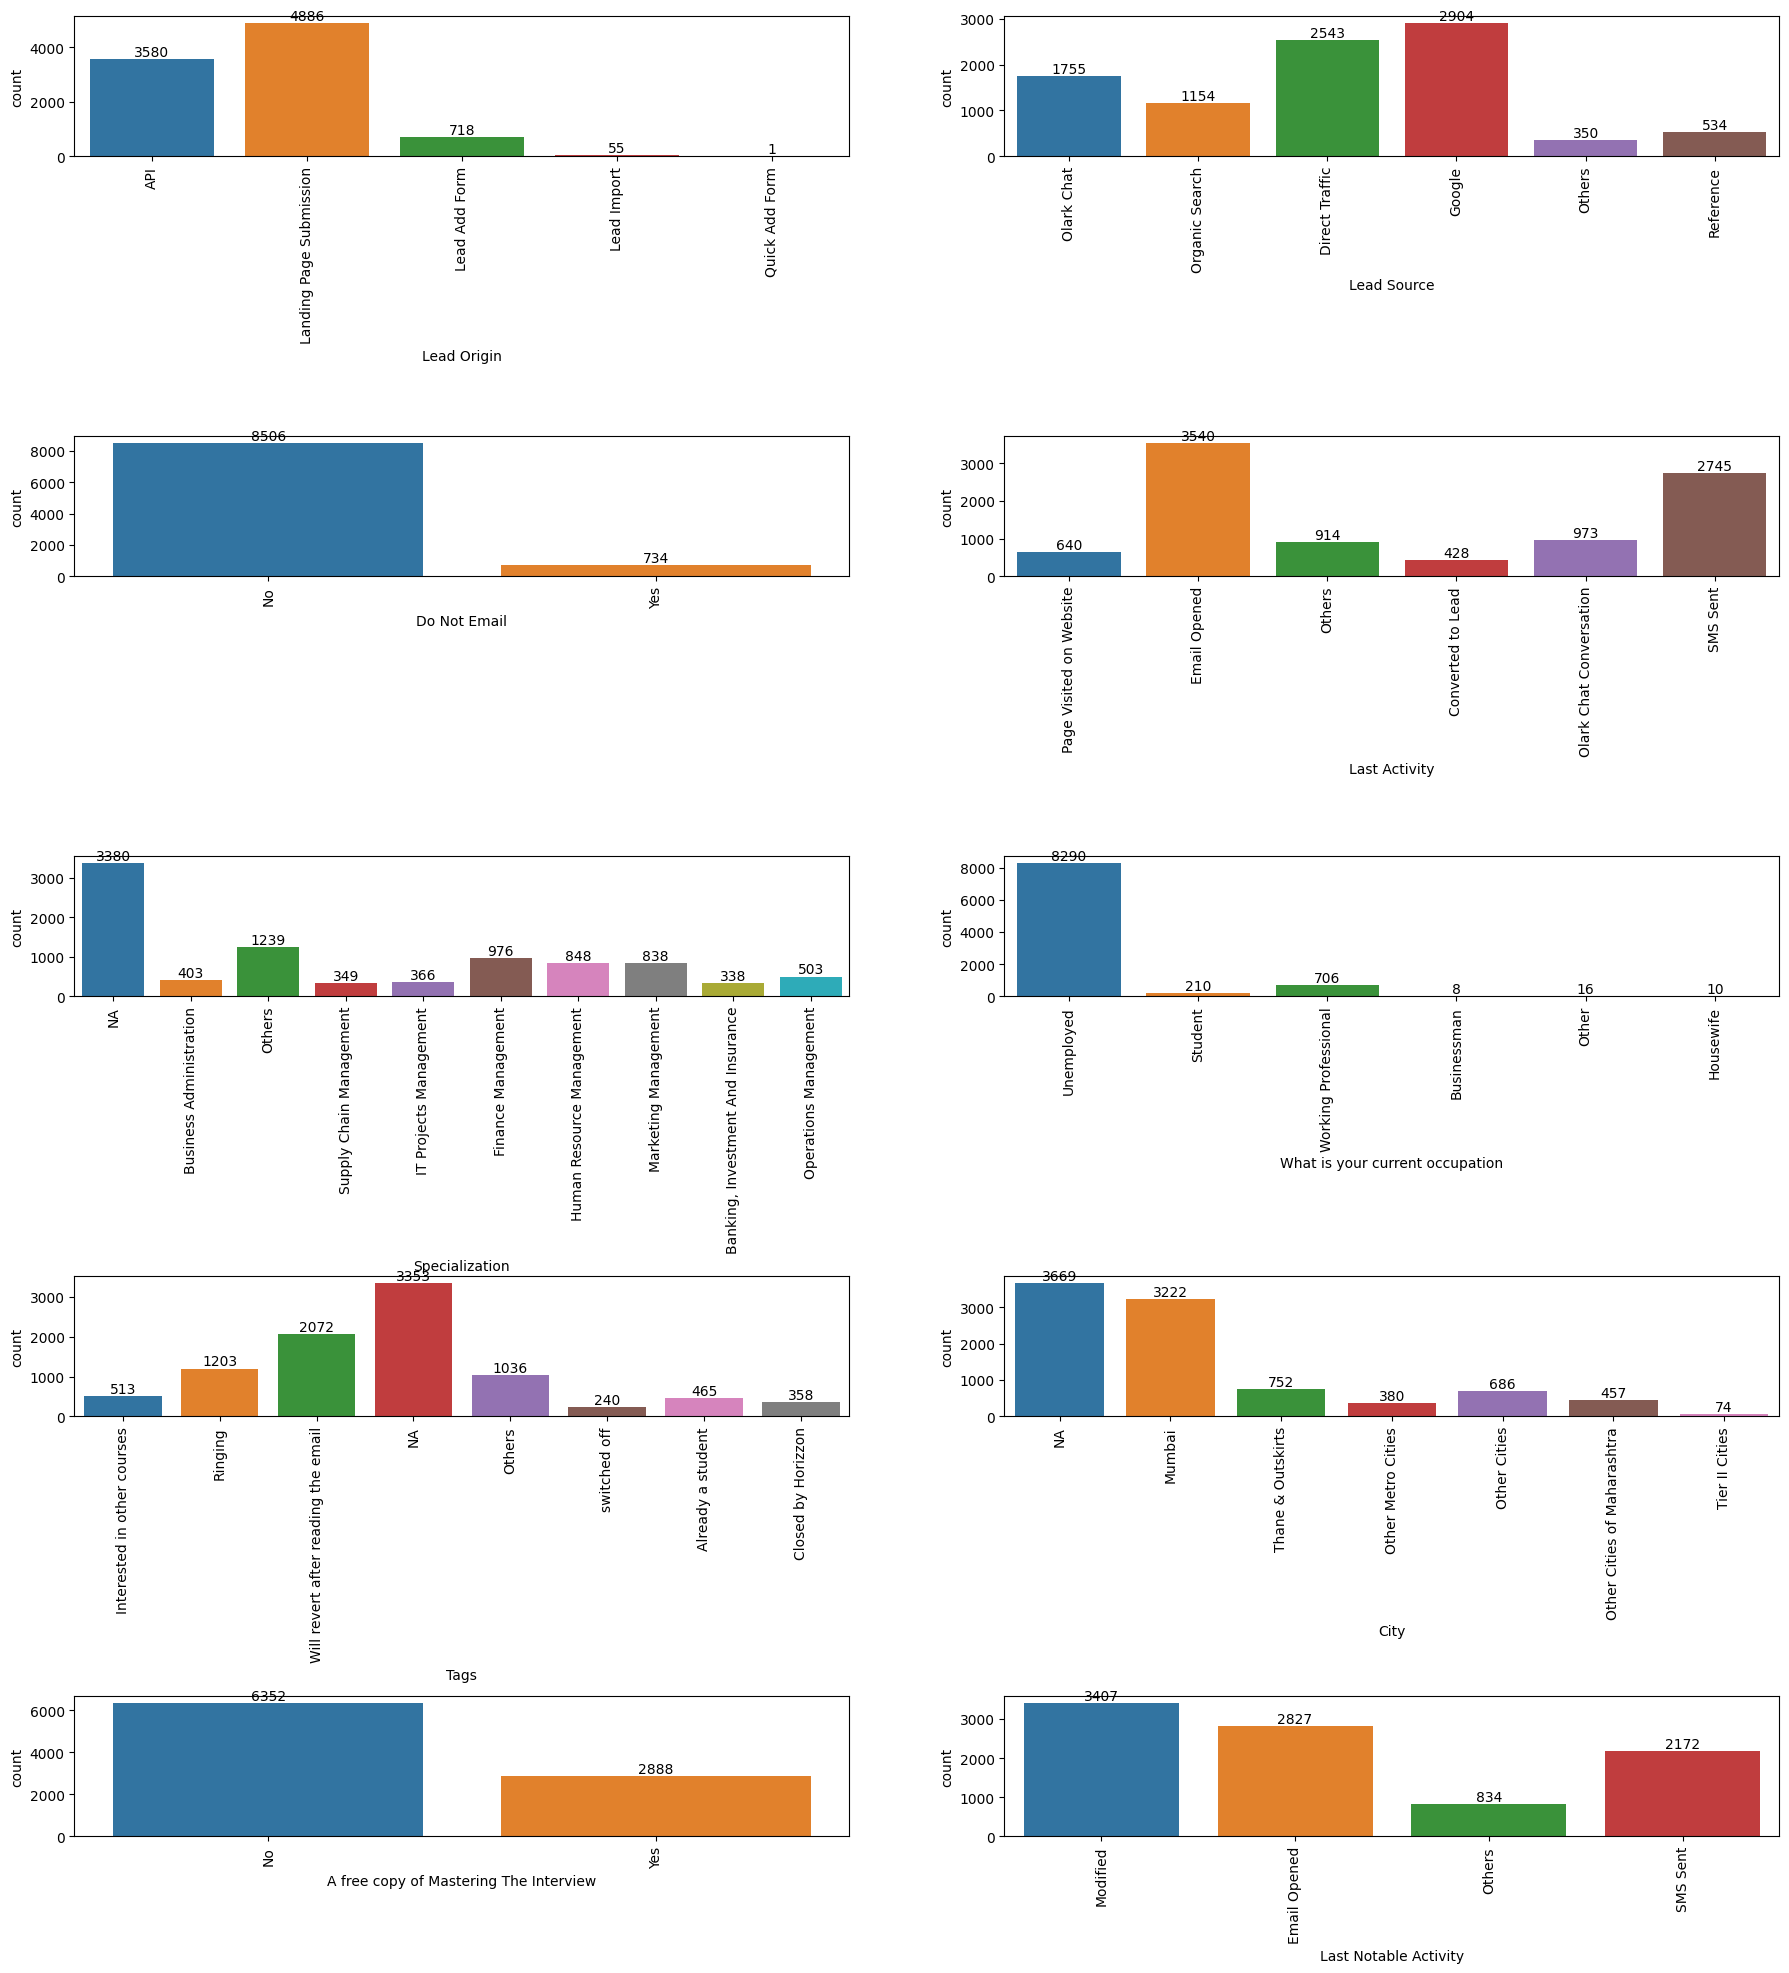

In [22]:
plt.figure(figsize=(22,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_columns):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leads_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [23]:
def get_outliers_iqr(data,column):
    outliers=[]
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    IQR = q3-q1
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)  
    for i in data:
        if(i<lower_bound or i>upper_bound):
            outliers.append(i)
    print(f'1st quartile start value is {q1} and 3rd quartile end value is {q3}')
    print(f'There are {len(outliers)}({round((len(outliers)/leads_df.shape[0]),2)}%) Potential Outliers in the column {column}')



### univariate analysis on numercal variables

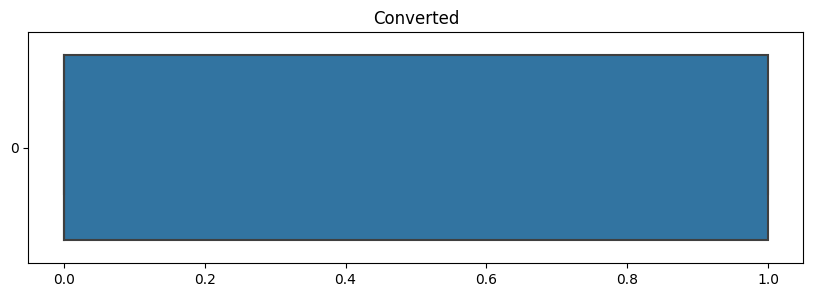

1st quartile start value is 0.0 and 3rd quartile end value is 1.0
There are 0(0.0%) Potential Outliers in the column Converted


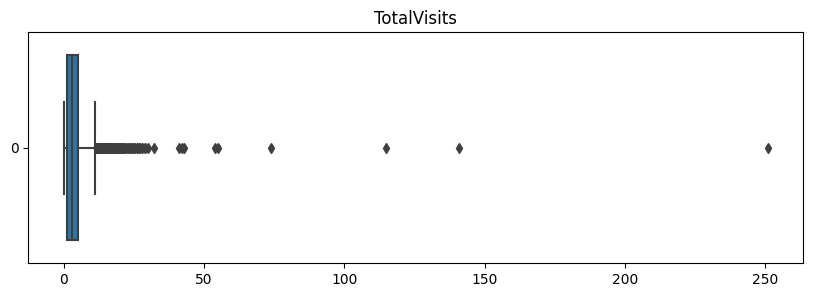

1st quartile start value is 1.0 and 3rd quartile end value is 5.0
There are 267(0.03%) Potential Outliers in the column TotalVisits


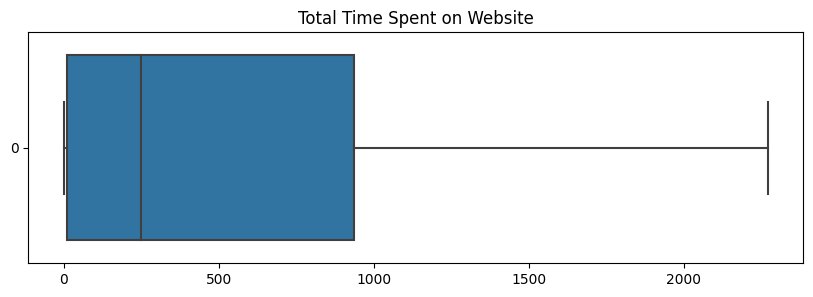

1st quartile start value is 12.0 and 3rd quartile end value is 936.0
There are 0(0.0%) Potential Outliers in the column Total Time Spent on Website


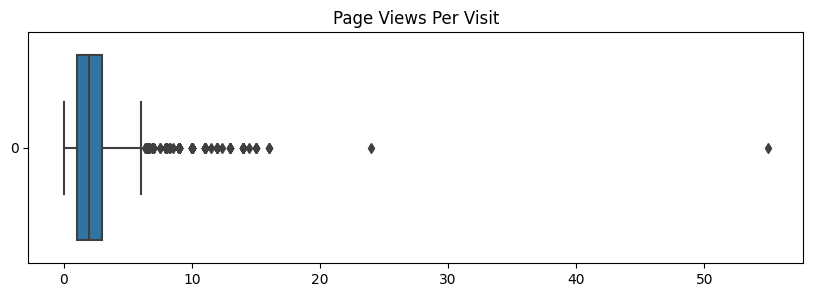

1st quartile start value is 1.0 and 3rd quartile end value is 3.0
There are 360(0.04%) Potential Outliers in the column Page Views Per Visit


In [24]:
for i in numeric_columns:
    plt.figure(figsize=(10,3))
    plt.title(i)
    sns.boxplot(leads_df[i],orient='h');
    plt.show();
    get_outliers_iqr(leads_df[i],i)


In [25]:
# Function for outlier treatment
def outlier_treatment(dataframe, cols_to_check):
    for col in cols_to_check:
        # Calculate the IQR (Interquartile Range) for the column
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers using the upper and lower bounds
        dataframe[col] = dataframe[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Call the function to treat outliers in the specified columns
outlier_treatment(leads_df, numeric_columns)

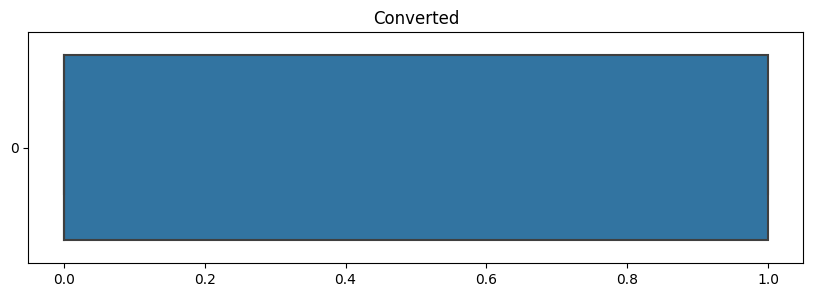

1st quartile start value is 0.0 and 3rd quartile end value is 1.0
There are 0(0.0%) Potential Outliers in the column Converted


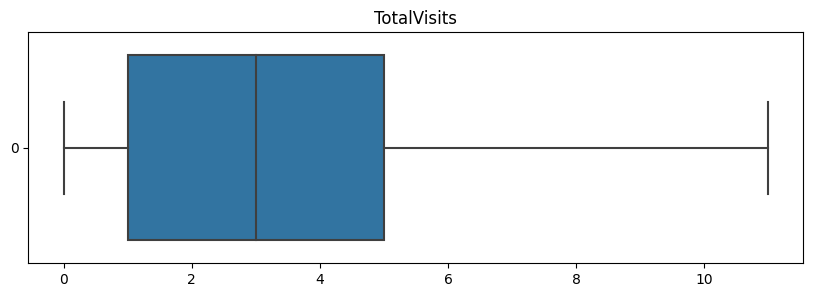

1st quartile start value is 1.0 and 3rd quartile end value is 5.0
There are 0(0.0%) Potential Outliers in the column TotalVisits


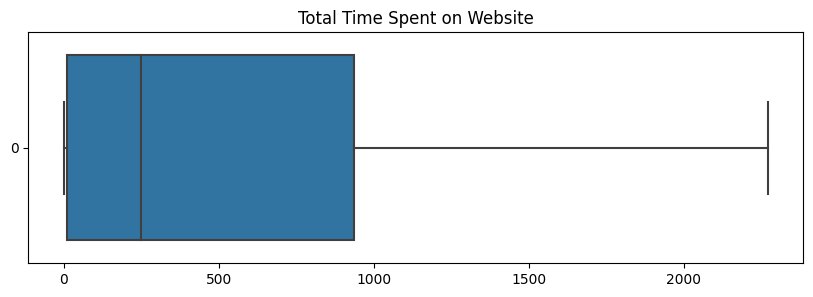

1st quartile start value is 12.0 and 3rd quartile end value is 936.0
There are 0(0.0%) Potential Outliers in the column Total Time Spent on Website


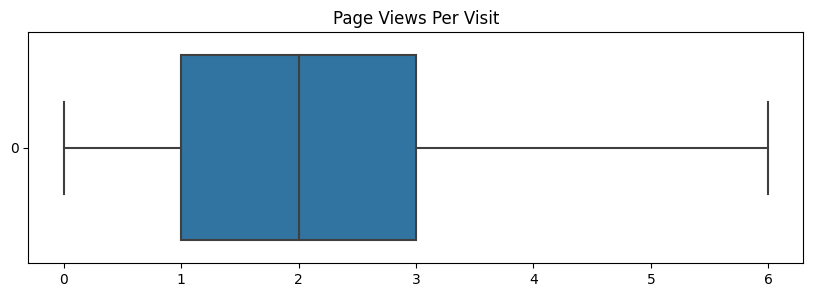

1st quartile start value is 1.0 and 3rd quartile end value is 3.0
There are 0(0.0%) Potential Outliers in the column Page Views Per Visit


In [26]:
for i in numeric_columns:
    plt.figure(figsize=(10,3))
    plt.title(i)
    sns.boxplot(leads_df[i],orient='h');
    plt.show();
    get_outliers_iqr(leads_df[i],i)


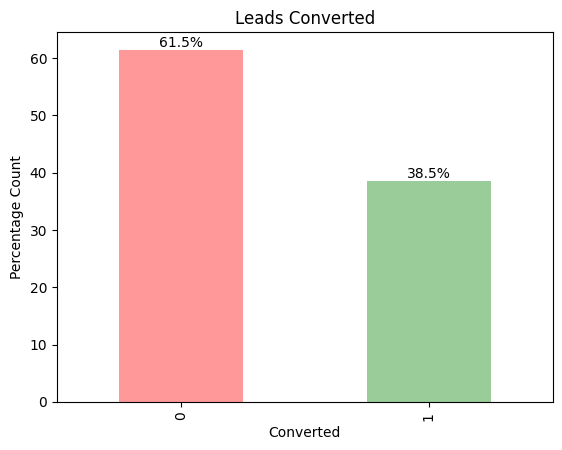

In [27]:
ax=(100 * leads_df["Converted"].value_counts(normalize=True)).plot.bar(color=["red", "green"], alpha=0.4)
# Adding and formatting title
plt.title("Leads Converted")

# Labeling Axes
plt.xlabel('Converted')
plt.ylabel("Percentage Count")
# Annotate the bars with percentage values
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [28]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=leads_df,palette="prism_r",alpha=0.46)
    
    total=len(leads_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

### Bivariate analysis on categorical columns with respect to conversion(target variable)

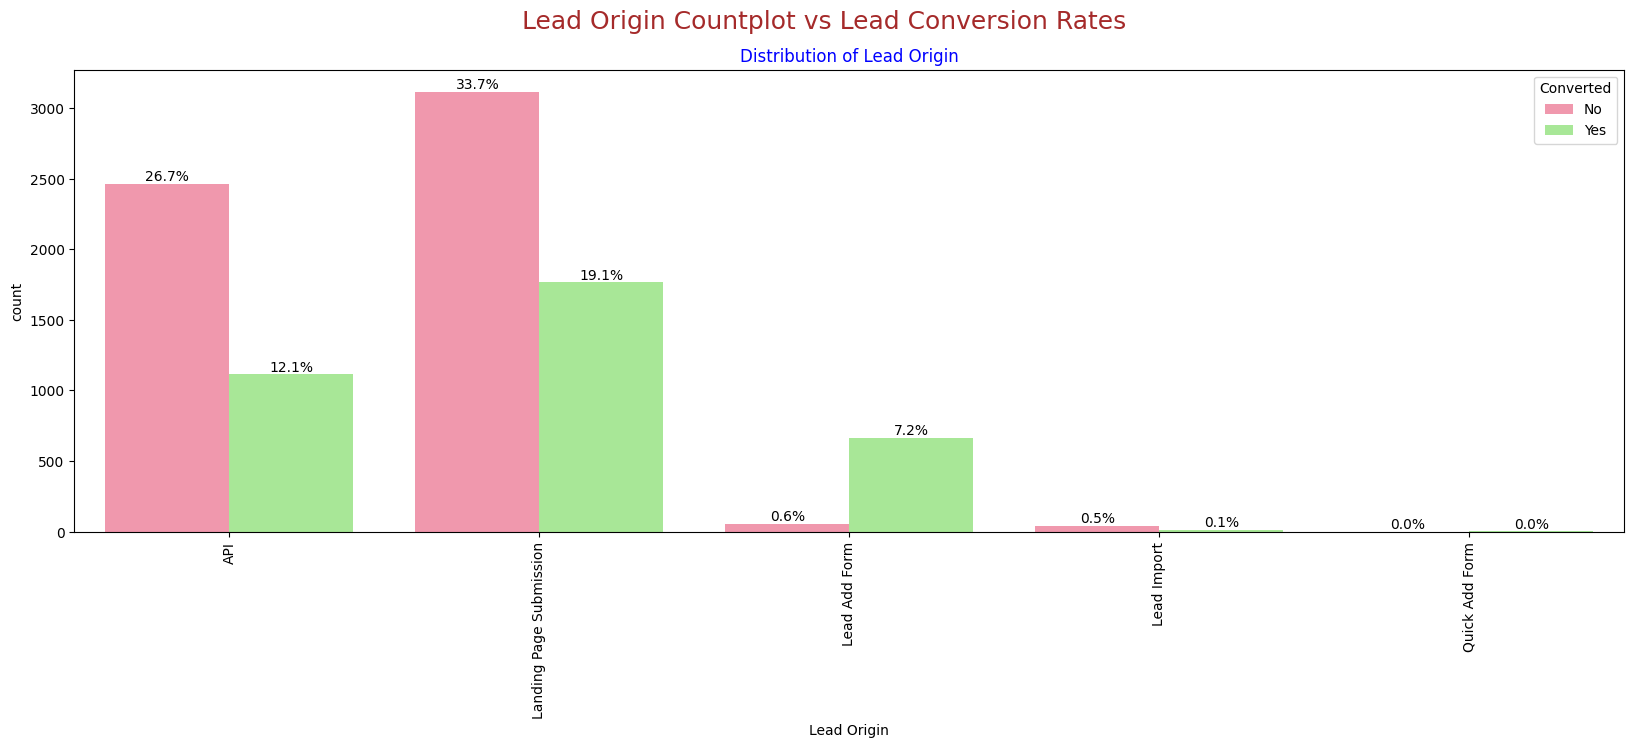

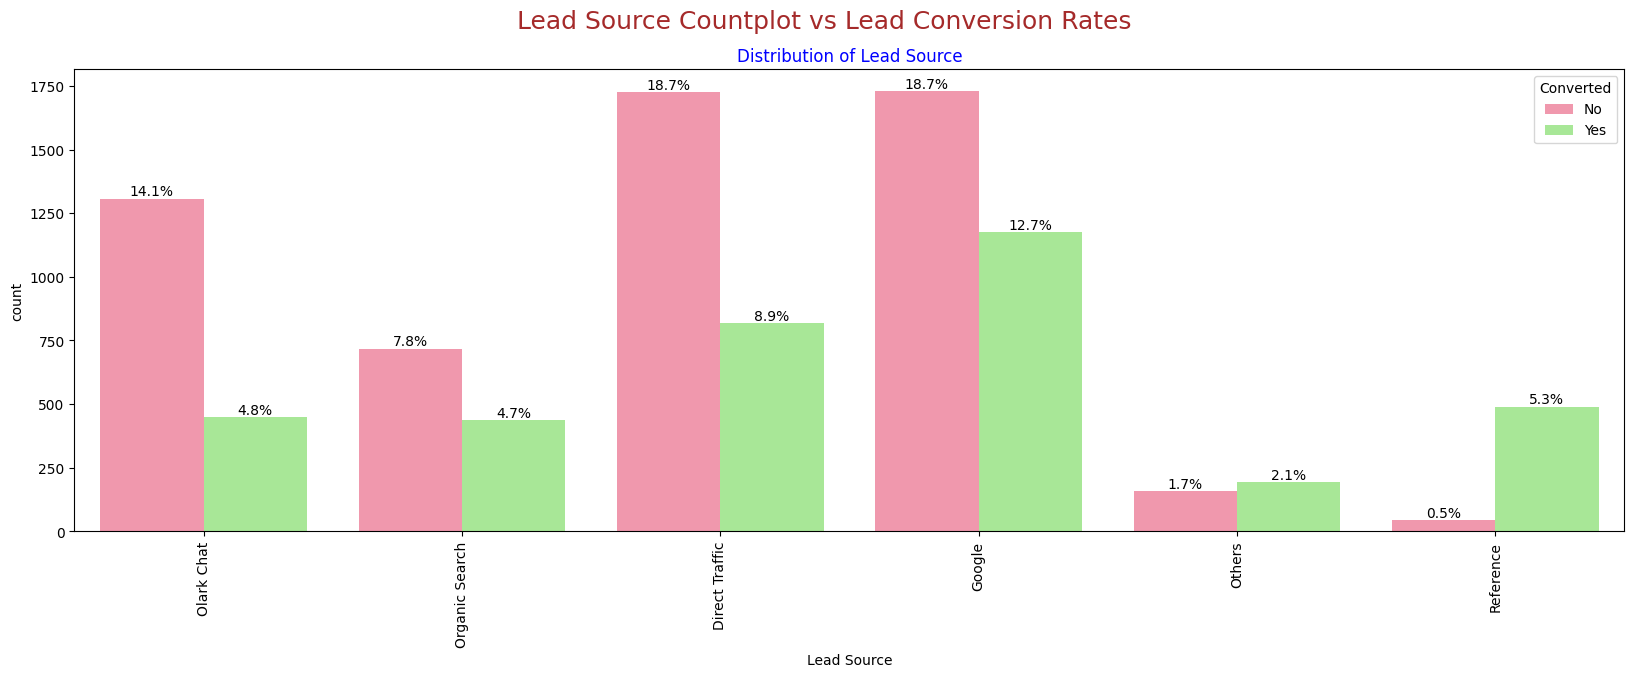

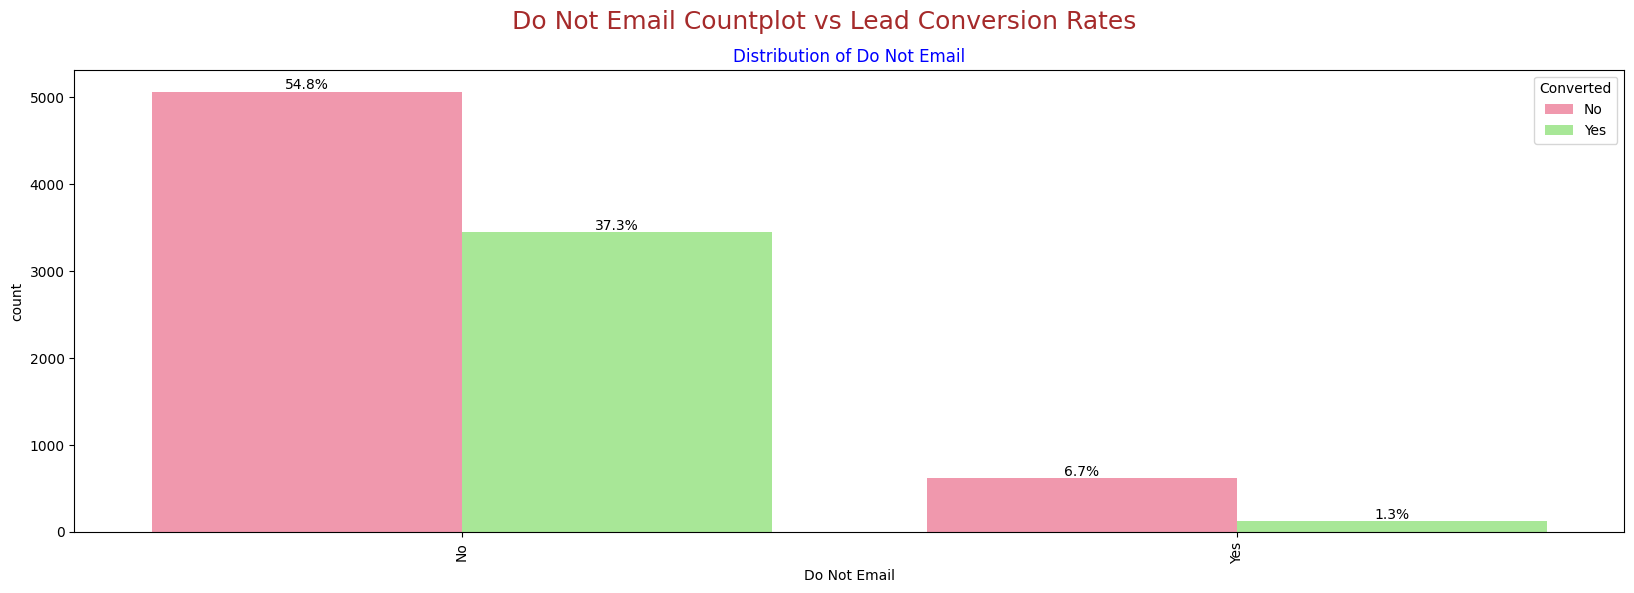

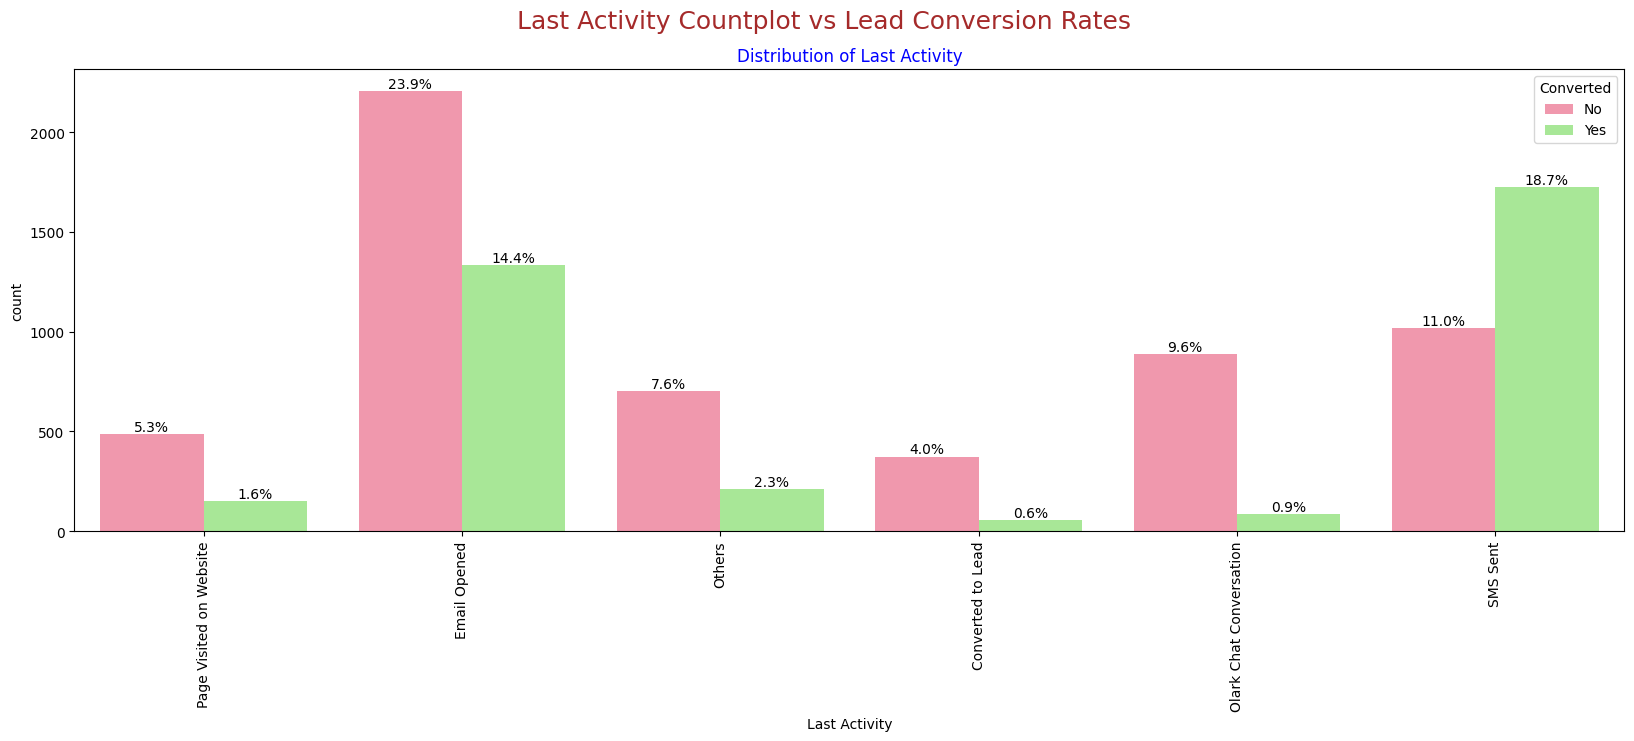

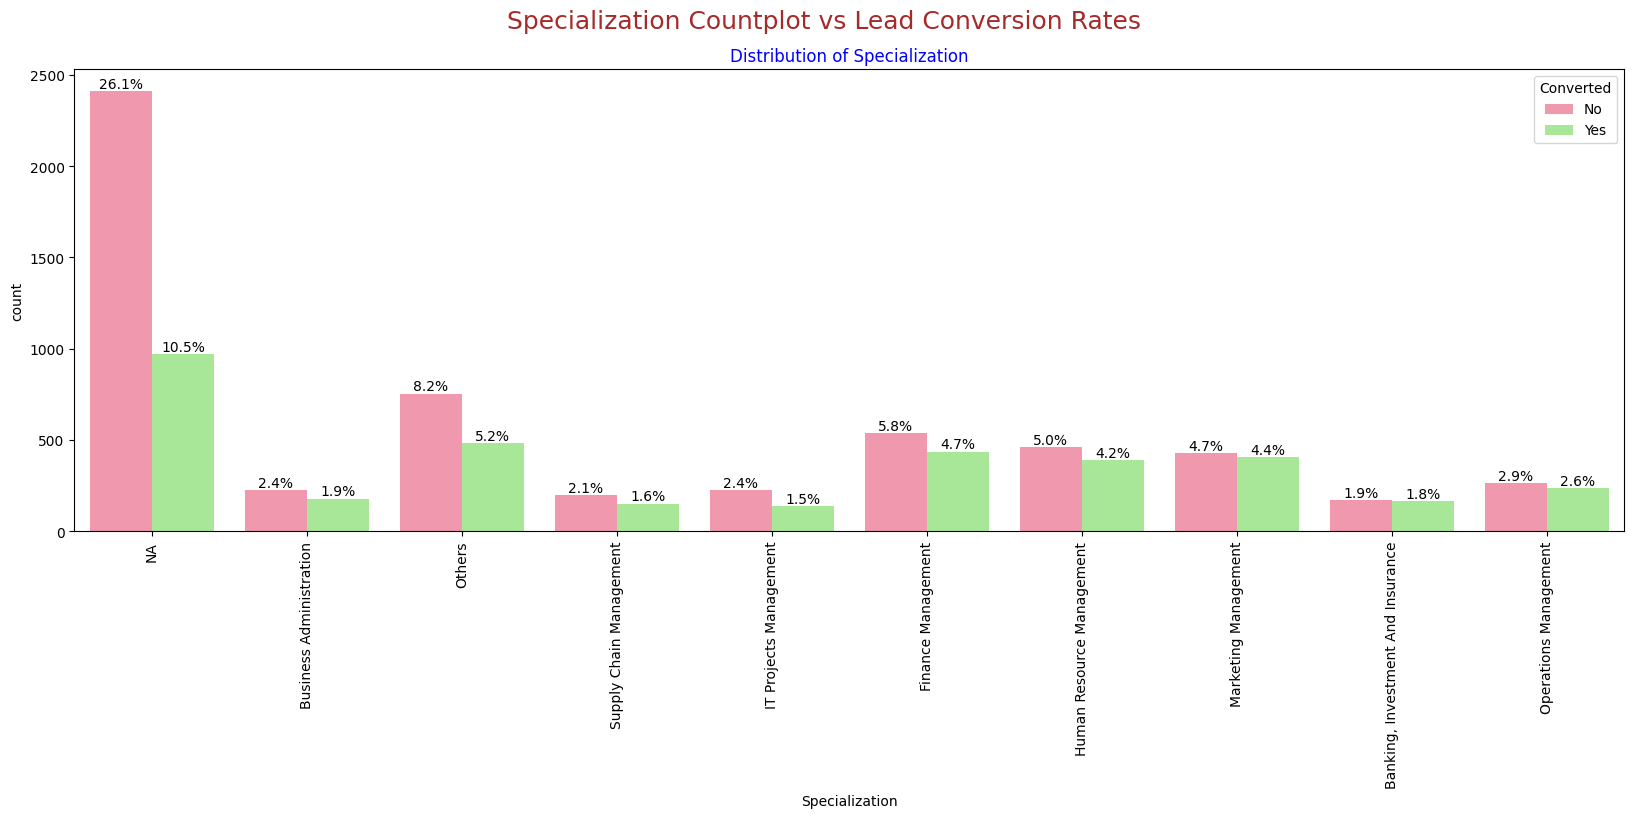

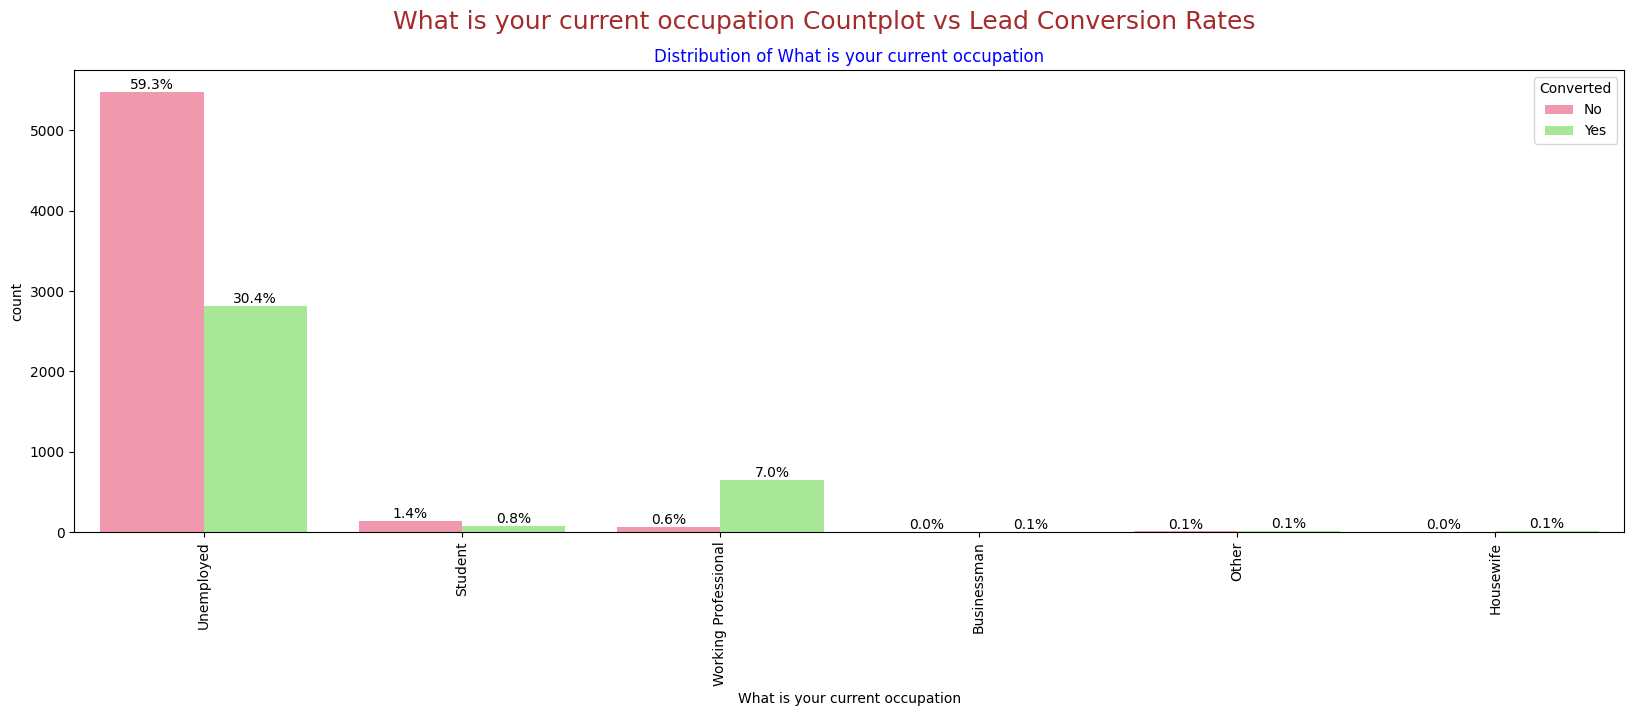

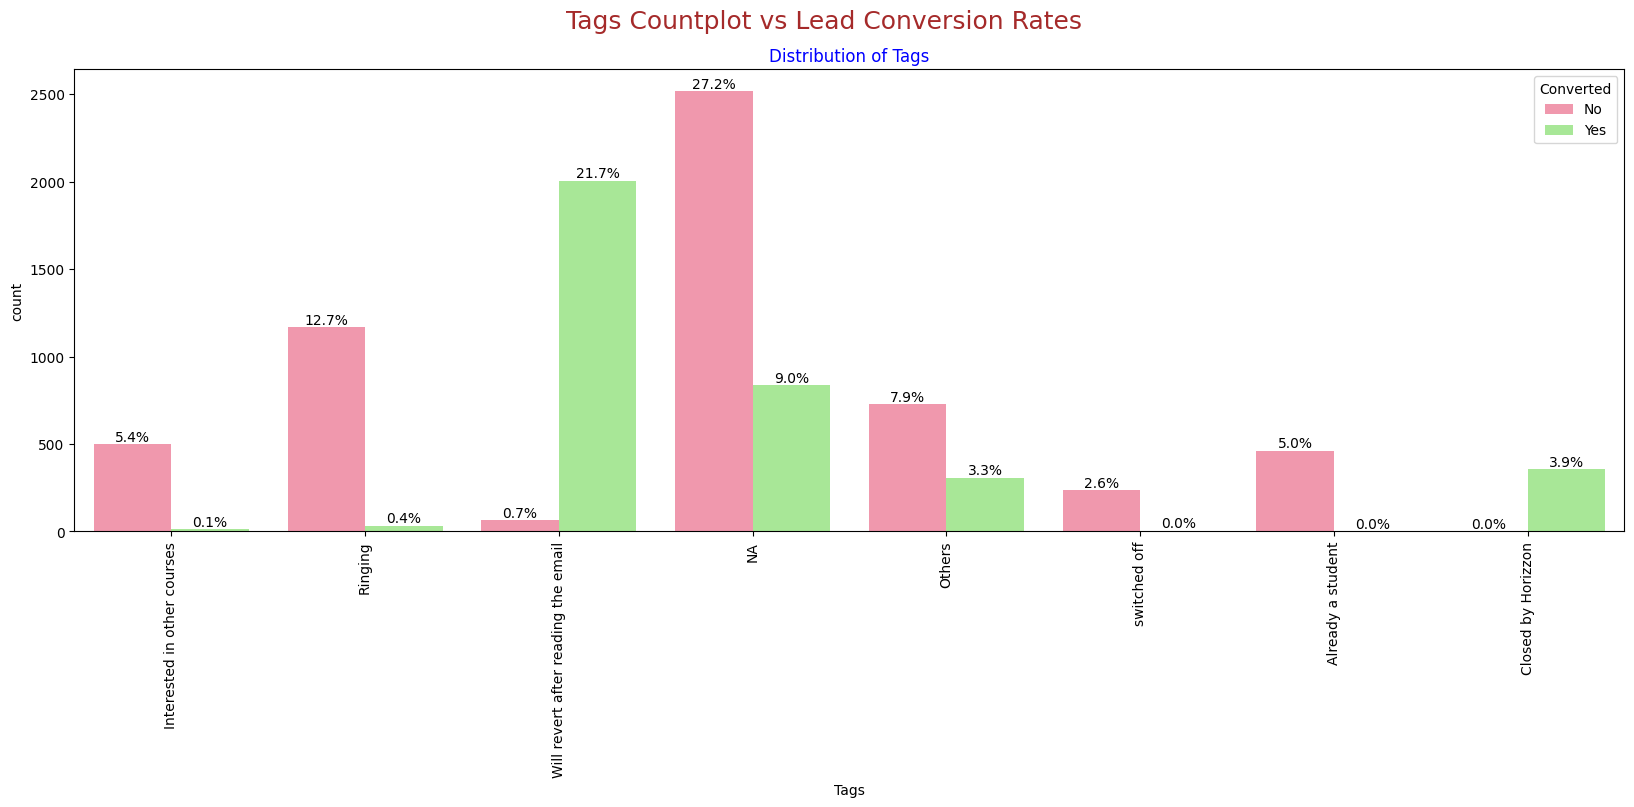

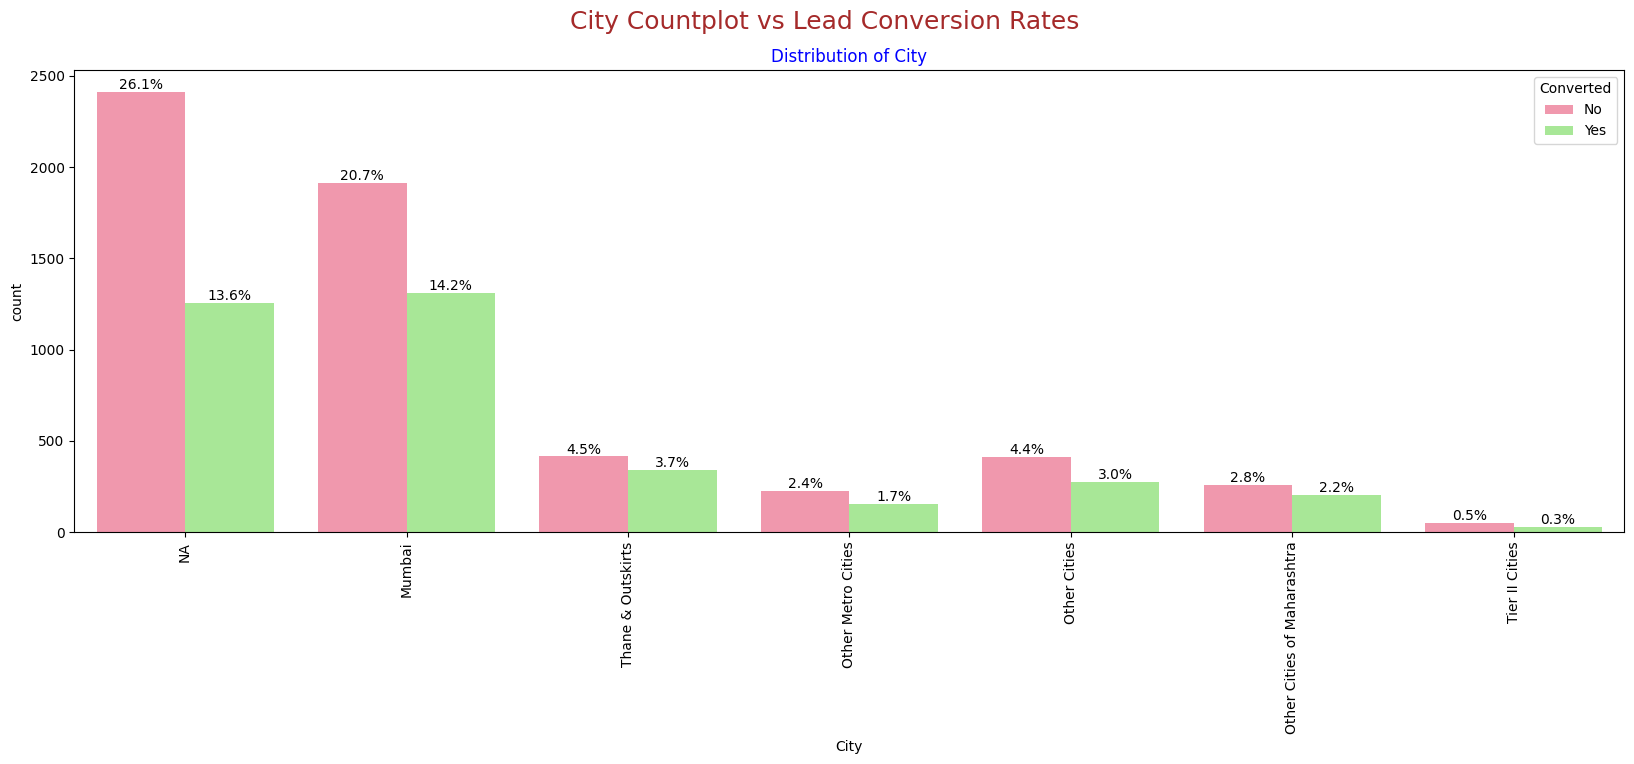

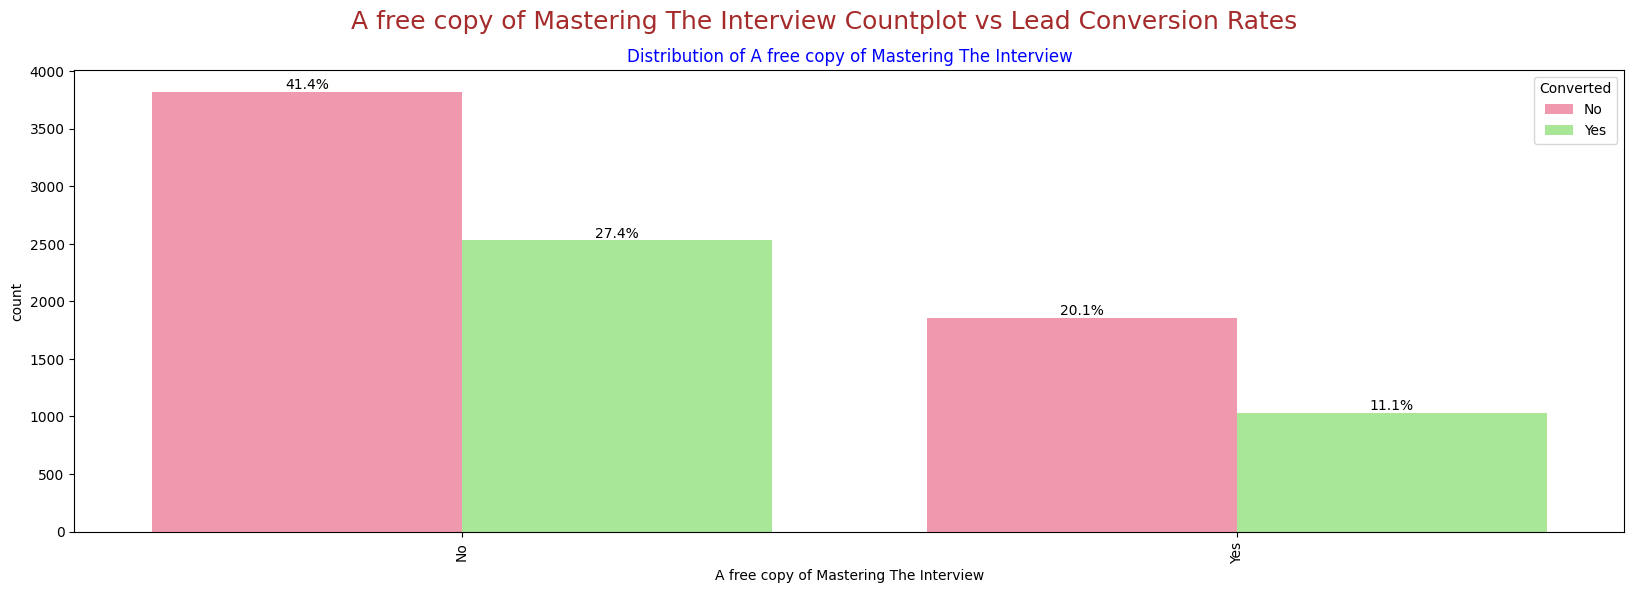

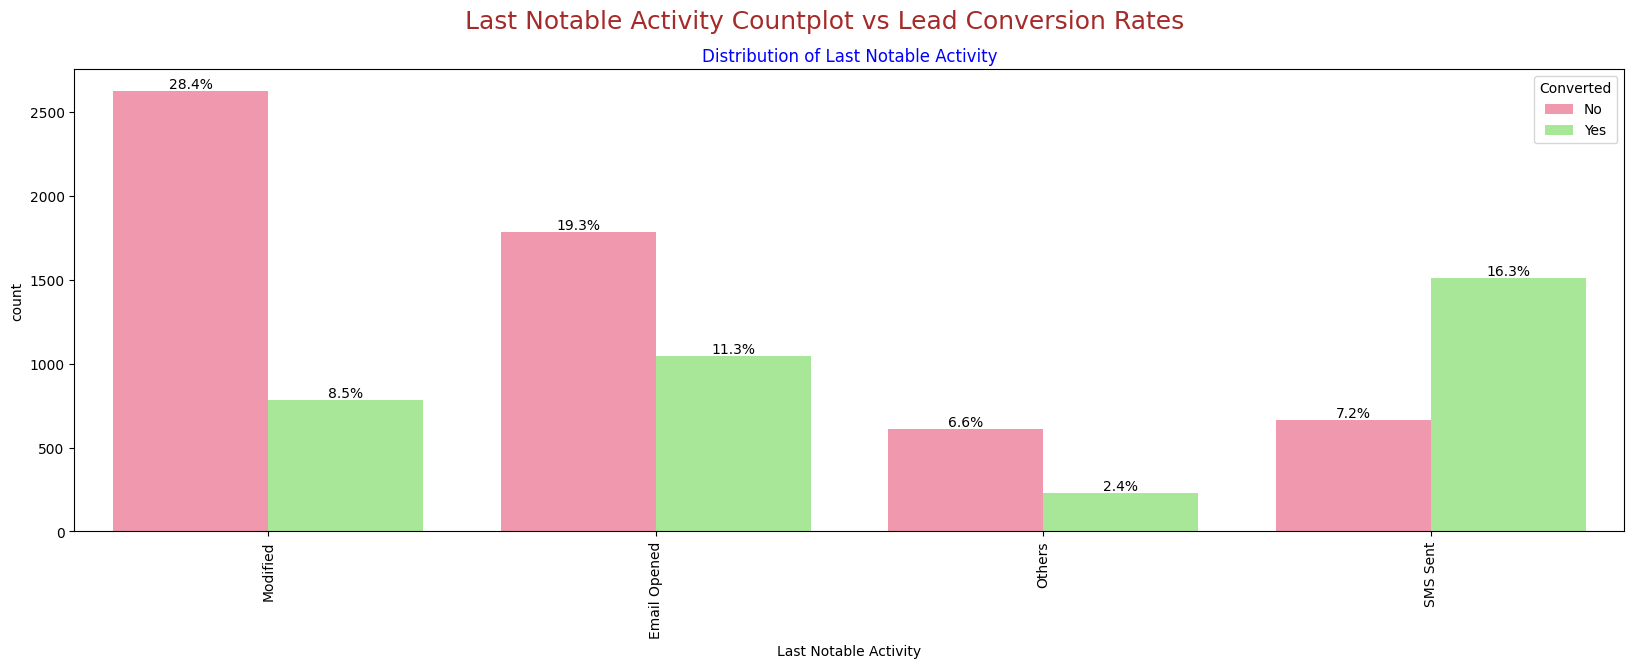

In [29]:
for i in categorical_columns:
    Bivariate_cat(leads_df,variable_name=i)

### Bivariate analysis on numerical columns with respect to conversion(target variable)

<Figure size 1600x400 with 0 Axes>

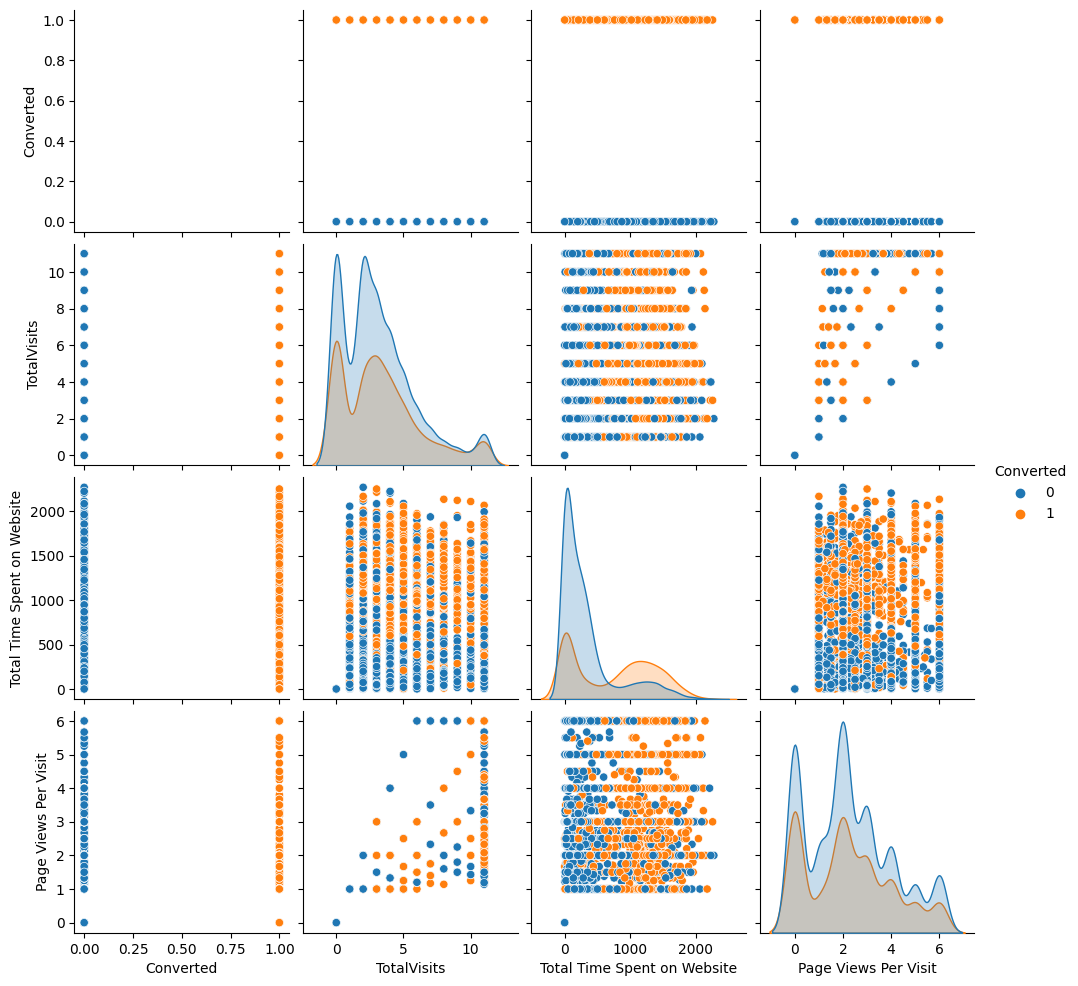

In [30]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=leads_df,vars=numeric_columns,hue="Converted")                                  
plt.show()

<Axes: >

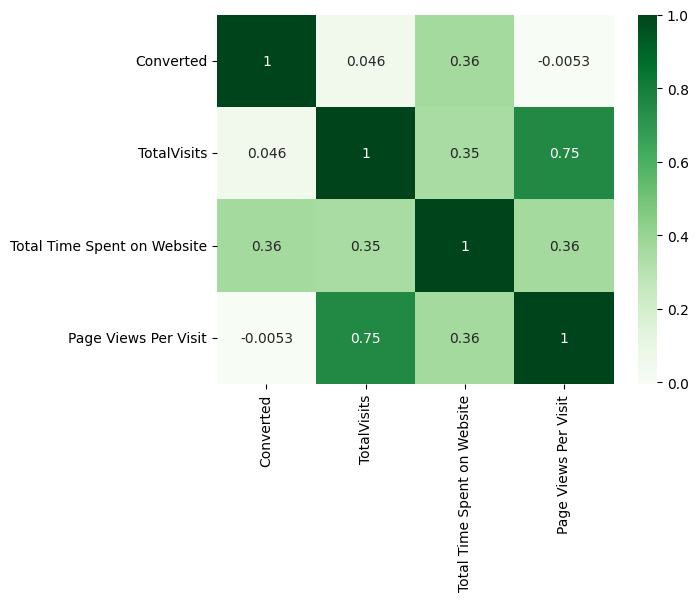

In [31]:
sns.heatmap(data=leads_df[numeric_columns].corr(), cmap='Greens',annot = True)

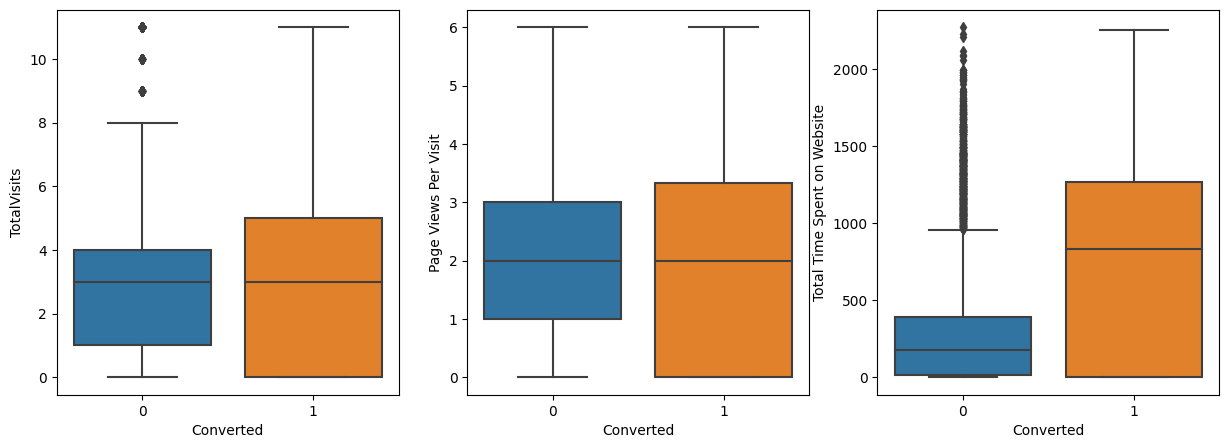

In [32]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

# 4. Data Preparation

In [33]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [34]:
print('categorical_columns')
print(categorical_columns)
print('numeric_columns')
print(numeric_columns)

categorical_columns
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
numeric_columns
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


In [35]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [36]:
leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                       NA   
1             Email Opened                       NA   
2             Email Opened  Business Administration   
3                   Others                   Others   
4        Converted to Lead                       NA   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  
0      NA                                       0              Modified  
1      NA                                       0          Email Opened  
2  Mumbai                                       1          Email Opened  
3  Mumbai                                       0              Modified  
4  Mumbai                                       0              Modified

### Creating dummy variables

In [37]:
dummy_columns = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation'
                ,'Tags','City','Last Notable Activity']

dummy = pd.get_dummies(leads_df[dummy_columns], drop_first=True)
leads_df = pd.concat([leads_df, dummy], axis=1)
leads_df.drop(dummy_columns,axis=1,inplace=True)

In [38]:
leads_df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Last Activity_Email Opened  \
0                      0                           0   
1                      0                           1   
2                      0                           1   
3                      0                           0   
4                      0                           0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_Finance Management  \
0                                       0                                  0   
1                                       0                                  0   
2                                       1                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3       

In [39]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

# 5.Data Modeling

### Train - Test split

In [40]:
# Putting predictor variables to X
X = leads_df.drop('Converted', axis=1)

# Putting Target variables to y
y = leads_df["Converted"]

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (6468, 49) 
y_train: (6468,)
X_test: (2772, 49) 
y_test: (2772,)


### Feature Scaling

In [43]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [44]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.122305                    -0.885371   
6795     -0.291638     0.275215                     0.005716   
3516     -0.291638     0.624595                    -0.691418   
8105     -0.291638     0.624595                     1.365219   
3934     -0.291638    -1.122305                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.266675                               -0.673169   
6795             -0.516439                                1.485511   
3516              0.143543                               -0.673169   
8105              1.553761                               -0.673169   
3934             -1.266675                               -0.673169   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
1871                        0                           0                   0   
6795                        0                           0                   0   
3516                        0                           0                   0   
8105                        0                           0                   1   
3934                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Last Activity_Email Opened  \
1871                      0                           1   
6795                      0                           1   
3516                      0                           1   
8105                      0                           0   
3934                      0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                                      0                       0   
6795                                      0                       0   
3516                                      0                       0   
8105                                      0                       1   
3934                                      0                       0   

      Specialization_Business Administration  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Finance Management  \
1871                                  0   
6795                                  0   
3516                                  0   
8105                                  0   
3934                                  0   

      Specialization_Human Resource Management  \
1871

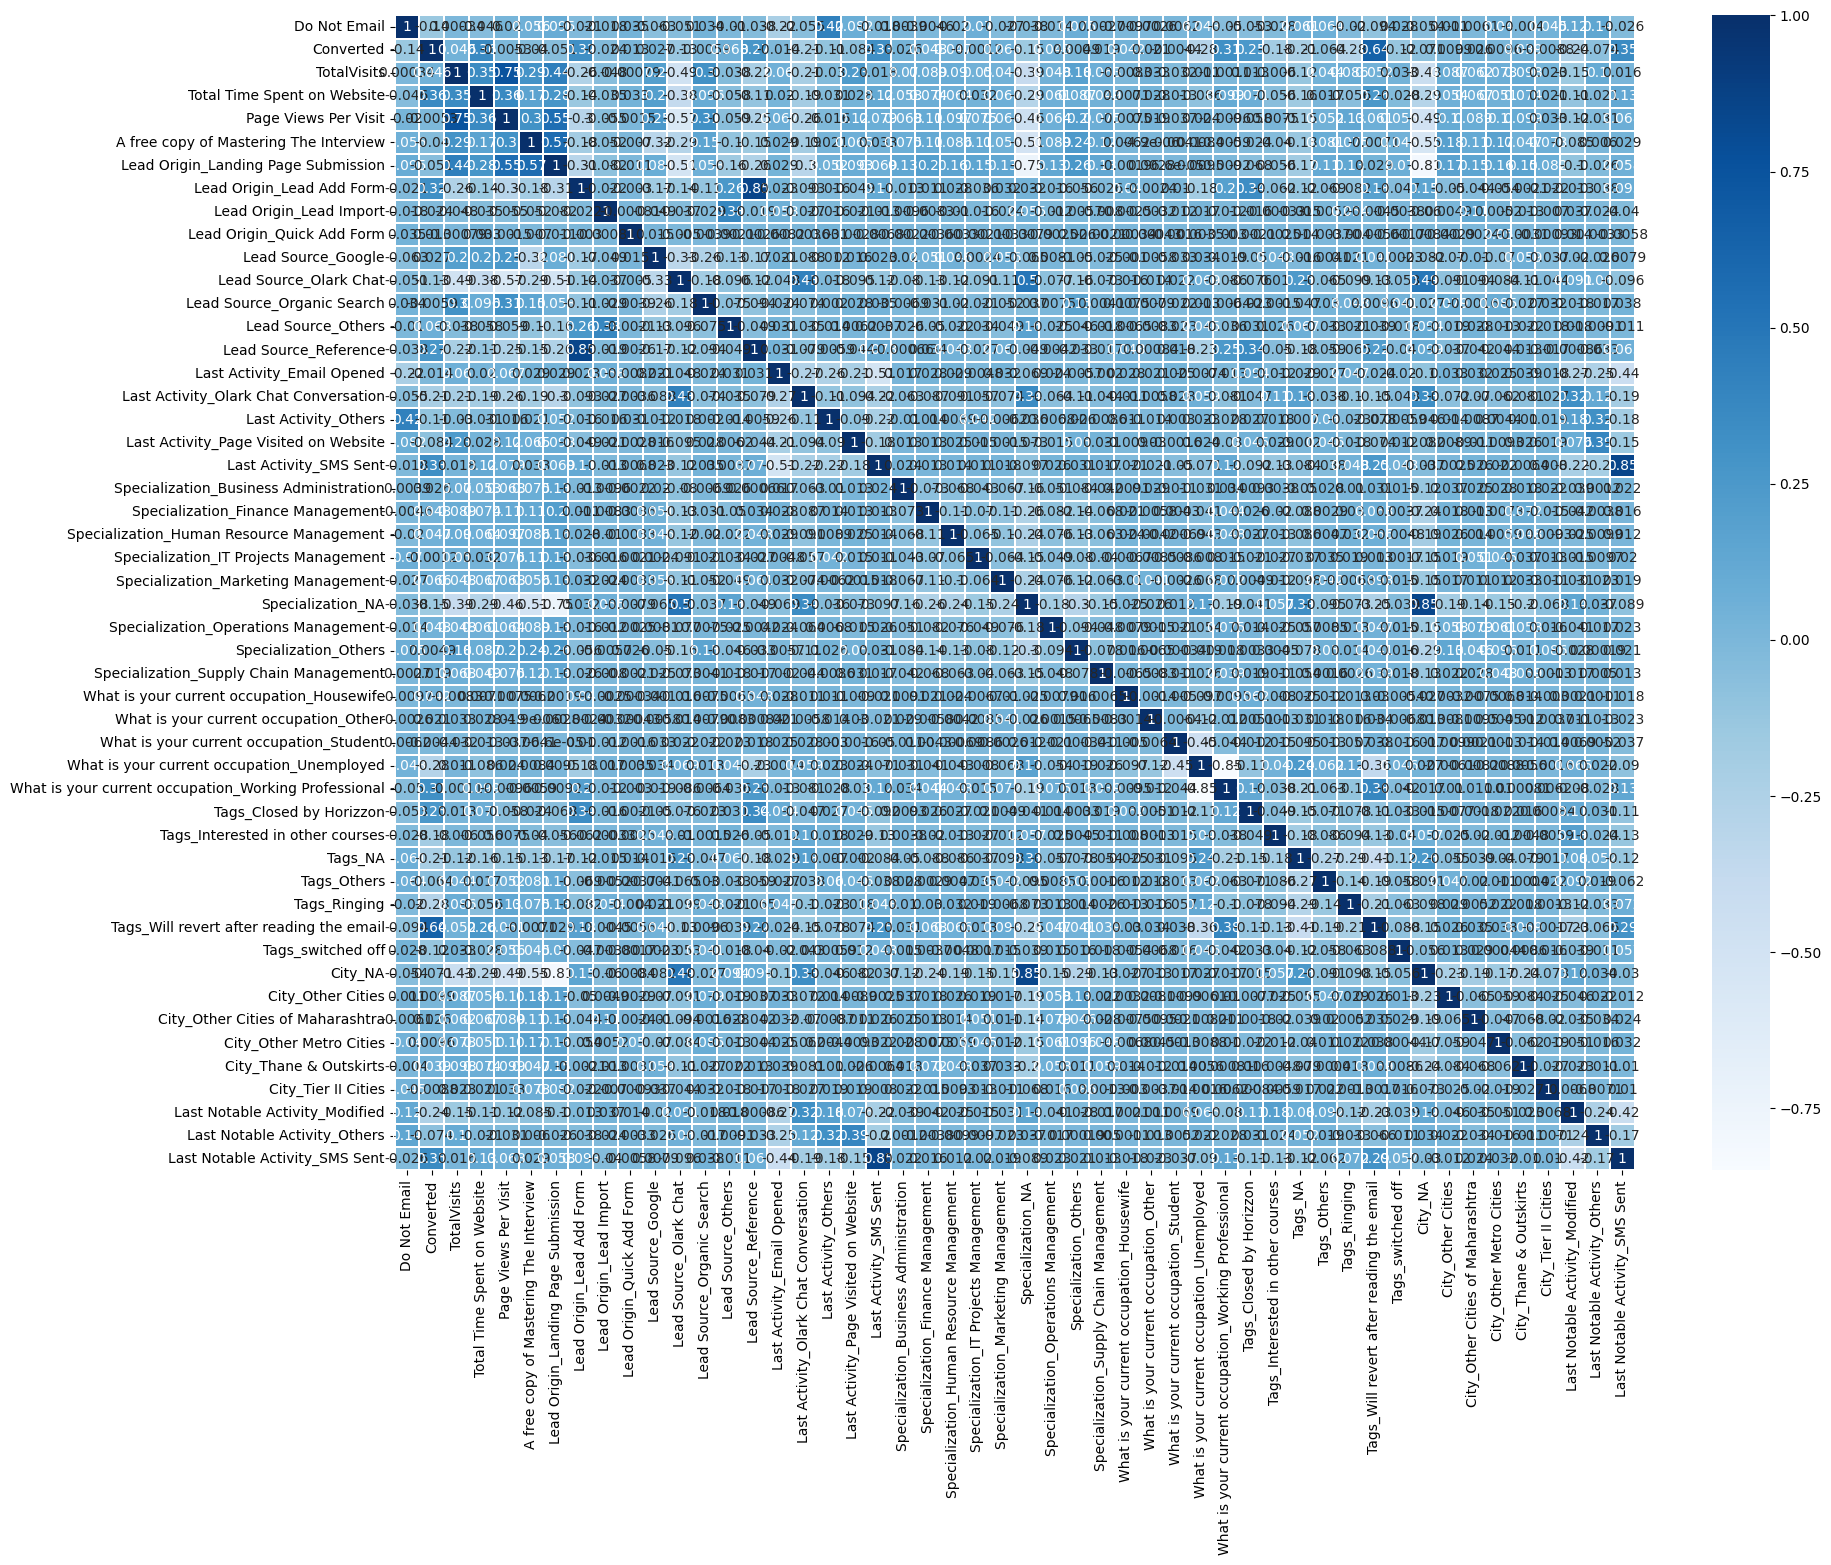

In [45]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(leads_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

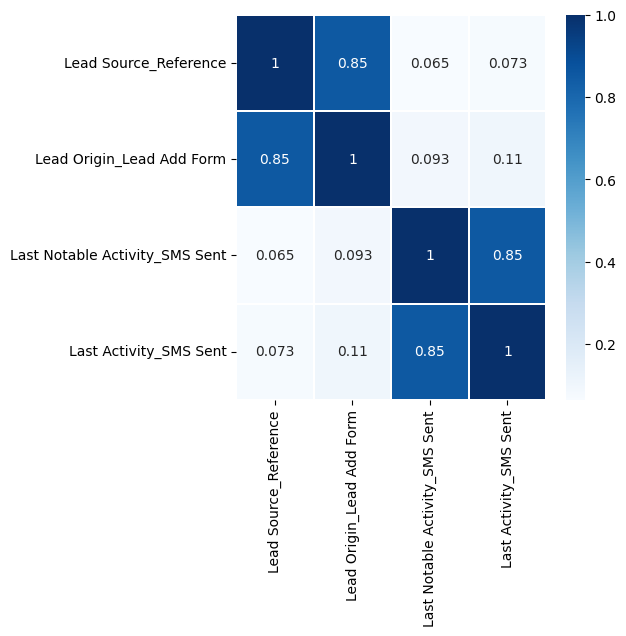

In [46]:
# # as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# # analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(leads_df[
    ["Lead Source_Reference","Lead Origin_Lead Add Form",
    "Last Notable Activity_SMS Sent","Last Activity_SMS Sent"]
    
].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()


In [47]:
X_test = X_test.drop(["Lead Origin_Lead Add Form",
    "Last Notable Activity_SMS Sent"],1)

X_train = X_train.drop(["Lead Origin_Lead Add Form",
    "Last Notable Activity_SMS Sent"],1)

In [48]:
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.122305                    -0.885371   
6795     -0.291638     0.275215                     0.005716   
3516     -0.291638     0.624595                    -0.691418   
8105     -0.291638     0.624595                     1.365219   
3934     -0.291638    -1.122305                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.266675                               -0.673169   
6795             -0.516439                                1.485511   
3516              0.143543                               -0.673169   
8105              1.553761                               -0.673169   
3934             -1.266675                               -0.673169   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Import  \
1871                                    0                        0   
6795                                    1                        0   
3516                                    0                        0   
8105                                    1                        0   
3934                                    0                        0   

      Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Olark Chat  \
1871                           0                   0                       1   
6795                           0                   0                       0   
3516                           0                   0                       1   
8105                           0                   1                       0   
3934                           0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
1871                           1                                      0   
6795                           1                                      0   
3516                           1                                      0   
8105                           0                                      0   
3934                           1                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  \
1871                     0                                      0   
6795                     0                                      0   
3516                     0                                      0   
8105                     0                                      0   
3934                     0                                      0   

      Last Activity_SMS Sent  Specialization_Business Administration  \
1871                       0                                       0   
6795                       0                                       0   
3516                       0                                       0   
8105                       1                                       0   
3934                       0                                       0   

      Specialization_Finance Management  \
1871                                  0   
6795                                  0   
3516                                  0   
8105                                  0   
3934                                  0   

      Specialization_Human Resource Management  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934           

# 6. Model Building

### Feature Selection Using RFE (Recursive Feature Elimination)

In [49]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [50]:
#checking the output of RFE
rank_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),columns=['feature','Chosen','rank'])
rank_df.sort_values(by='rank')

feature  Chosen  rank
31  What is your current occupation_Working Profes...    True     1
2                         Total Time Spent on Website    True     1
45                     Last Notable Activity_Modified    True     1
38                                  Tags_switched off    True     1
5                 Lead Origin_Landing Page Submission    True     1
6                             Lead Origin_Lead Import    True     1
32                            Tags_Closed by Horizzon    True     1
37           Tags_Will revert after reading the email    True     1
33                   Tags_Interested in other courses    True     1
36                                       Tags_Ringing    True     1
11                                 Lead Source_Others    True     1
12                              Lead Source_Reference    True     1
34                                            Tags_NA    True     1
17                             Last Activity_SMS Sent    True     1
35                                        Tags_Others    True     1
13                         Last Activity_Email Opened   False     2
27          What is your current occupation_Housewife   False     3
21              Specialization_IT Projects Management   False     4
19                  Specialization_Finance Management   False     5
14              Last Activity_Olark Chat Conversation   False     6
3                                Page Views Per Visit   False     7
46                       Last Notable Activity_Others   False     8
29            What is your current occupation_Student   False     9
9                              Lead Source_Olark Chat   False    10
7                          Lead Origin_Quick Add Form   False    11
1                                         TotalVisits   False    12
15                               Last Activity_Others   False    13
0                                        Do Not Email   False    14
28              What is your current occupation_Other   False    15
26             Specialization_Supply Chain Management   False    16
25                              Specialization_Others   False    17
8                                  Lead Source_Google   False    18
16              Last Activity_Page Visited on Website   False    19
23                                  Specialization_NA   False    20
18             Specialization_Business Administration   False    21
20           Specialization_Human Resource Management   False    22
22                Specialization_Marketing Management   False    23
42                            City_Other Metro Cities   False    24
44                                City_Tier II Cities   False    25
24               Specialization_Operations Management   False    26
43                             City_Thane & Outskirts   False    27
40                                  City_Other Cities   False    28
30         What is your current occupation_Unemployed   False    29
4              A free copy of Mastering The Interview   False    30
39                                            City_NA   False    31
10                         Lead Source_Organic Search   False    32
41                   City_Other Cities of Maharashtra   False    33

In [51]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_NA', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified'],
      dtype='object')

In [52]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

# Model 1

In [53]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                   -4.316514
Total Time Spent on Website                              0.925256
Lead Origin_Landing Page Submission                     -0.997432
Lead Origin_Lead Import                                 -2.201729
Lead Source_Others                                       1.505777
Lead Source_Reference                                    0.812982
Last Activity_SMS Sent                                   1.904894
What is your current occupation_Working Professional     0.931737
Tags_Closed by Horizzon                                 10.456368
Tags_Interested in other courses                         1.274750
Tags_NA                                                  3.405141
Tags_Others                                              3.818521
Tags_Ringing                                             0.195495
Tags_Will revert after reading the email                 7.707327
Tags_switched off                                       -0.079497
Last Notab

In [54]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.0
Date:                Thu, 16 Nov 2023   Deviance:                       3086.0
Time:                        15:10:32   Pearson chi2:                 9.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5735
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Model 2

In [55]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Tags_switched off")

In [56]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                   -4.368198
Total Time Spent on Website                              0.925285
Lead Origin_Landing Page Submission                     -0.997384
Lead Origin_Lead Import                                 -2.201396
Lead Source_Others                                       1.505535
Lead Source_Reference                                    0.813181
Last Activity_SMS Sent                                   1.904093
What is your current occupation_Working Professional     0.931809
Tags_Closed by Horizzon                                 10.507879
Tags_Interested in other courses                         1.326587
Tags_NA                                                  3.457072
Tags_Others                                              3.870393
Tags_Ringing                                             0.247734
Tags_Will revert after reading the email                 7.759007
Last Notable Activity_Modified                          -1.324711
dtype: flo

In [57]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.0
Date:                Thu, 16 Nov 2023   Deviance:                       3086.0
Time:                        15:10:32   Pearson chi2:                 9.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5735
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Model 3

In [58]:
rfe_col=rfe_col.drop("Tags_Ringing")

In [59]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                   -4.176908
Total Time Spent on Website                              0.925776
Lead Origin_Landing Page Submission                     -0.996719
Lead Origin_Lead Import                                 -2.200193
Lead Source_Others                                       1.504887
Lead Source_Reference                                    0.821471
Last Activity_SMS Sent                                   1.906461
What is your current occupation_Working Professional     0.931720
Tags_Closed by Horizzon                                 10.313885
Tags_Interested in other courses                         1.134365
Tags_NA                                                  3.264778
Tags_Others                                              3.677667
Tags_Will revert after reading the email                 7.566450
Last Notable Activity_Modified                          -1.325030
dtype: float64

In [60]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.2
Date:                Thu, 16 Nov 2023   Deviance:                       3086.3
Time:                        15:10:32   Pearson chi2:                 9.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5735
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Model 4

In [61]:
rfe_col=rfe_col.drop("Lead Source_Reference")

In [62]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                                   -4.138261
Total Time Spent on Website                              0.919681
Lead Origin_Landing Page Submission                     -1.040575
Lead Origin_Lead Import                                 -2.225831
Lead Source_Others                                       1.484166
Last Activity_SMS Sent                                   1.927423
What is your current occupation_Working Professional     1.004131
Tags_Closed by Horizzon                                 10.619121
Tags_Interested in other courses                         1.118408
Tags_NA                                                  3.239362
Tags_Others                                              3.679538
Tags_Will revert after reading the email                 7.636674
Last Notable Activity_Modified                          -1.322235
dtype: float64

In [63]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1545.8
Date:                Thu, 16 Nov 2023   Deviance:                       3091.6
Time:                        15:10:33   Pearson chi2:                 9.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5732
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Model 5

In [64]:
rfe_col=rfe_col.drop("Tags_Interested in other courses")

In [65]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                                   -3.938074
Total Time Spent on Website                              0.921281
Lead Origin_Landing Page Submission                     -1.053471
Lead Origin_Lead Import                                 -2.271064
Lead Source_Others                                       1.524952
Last Activity_SMS Sent                                   1.908150
What is your current occupation_Working Professional     1.011007
Tags_Closed by Horizzon                                 10.405217
Tags_NA                                                  3.041428
Tags_Others                                              3.484836
Tags_Will revert after reading the email                 7.437032
Last Notable Activity_Modified                          -1.299453
dtype: float64

In [66]:
#Let's see the summary of our logistic regression model
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1549.1
Date:                Thu, 16 Nov 2023   Deviance:                       3098.2
Time:                        15:10:33   Pearson chi2:                 8.94e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5727
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [67]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

Features   VIF
0                 Lead Origin_Landing Page Submission  1.72
1            Tags_Will revert after reading the email  1.72
2                                             Tags_NA  1.51
3                      Last Notable Activity_Modified  1.51
4                              Last Activity_SMS Sent  1.49
5   What is your current occupation_Working Profes...  1.33
6                                         Tags_Others  1.25
7                                  Lead Source_Others  1.20
8                             Lead Origin_Lead Import  1.15
9                         Total Time Spent on Website  1.13
10                            Tags_Closed by Horizzon  1.12

# Model Evaluation

Confusion Matrix

Accuracy

Sensitivity and Specificity

Threshold determination using ROC & Finding Optimal cutoff point

Precision and Recall

In [68]:
# Getting the predicted values on the train set
y_train_pred = logm5.predict(X_train_sm5)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.008546
6795    0.125116
3516    0.010201
8105    0.138758
3934    0.046897
4844    0.999160
3297    0.003457
8071    0.997369
987     0.471788
7423    0.999273
dtype: float64

In [69]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00854566, 0.12511587, 0.01020052, 0.13875795, 0.04689676,
       0.9991597 , 0.00345685, 0.99736924, 0.47178818, 0.99927325])

In [70]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.008546         1871
1          0        0.125116         6795
2          0        0.010201         3516
3          0        0.138758         8105
4          0        0.046897         3934

In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.008546         1871          0
1          0        0.125116         6795          0
2          0        0.010201         3516          0
3          0        0.138758         8105          0
4          0        0.046897         3934          0

#  Confusion Matrix

In [72]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3770  232]
 [ 398 2068]]


In [73]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3770       |   232
# converted           398        |   2068  


# Above is the confusion matrix when we use threshold of probability as 0.5

# Accuracy

In [74]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.9025974025974026


# Metrics beyond simply accuracy

Sensitivity and Specificity

When we have Predicted at threshold 0.5 probability

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8386050283860503


In [77]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.9420289855072463


In [78]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.057971014492753624


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.904510556621881


#  Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [80]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

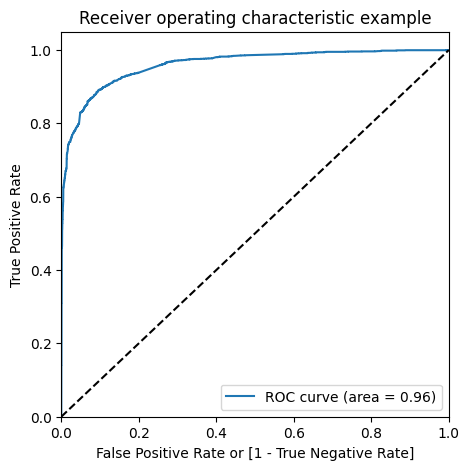

In [82]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

# Finding Optimal Cutoff Point/ Probability
It is that probability where we get balanced sensitivity and specificity

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.008546         1871          0    1    0    0    0    0   
1          0        0.125116         6795          0    1    1    0    0    0   
2          0        0.010201         3516          0    1    0    0    0    0   
3          0        0.138758         8105          0    1    1    0    0    0   
4          0        0.046897         3934          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.792517  0.972830  0.681409
0.2   0.2  0.874150  0.925791  0.842329
0.3   0.3  0.895176  0.894972  0.895302
0.4   0.4  0.902752  0.868208  0.924038
0.5   0.5  0.902597  0.838605  0.942029
0.6   0.6  0.895176  0.785483  0.962769
0.7   0.7  0.891466  0.754258  0.976012
0.8   0.8  0.883890  0.720600  0.984508
0.9   0.9  0.859617  0.645580  0.991504


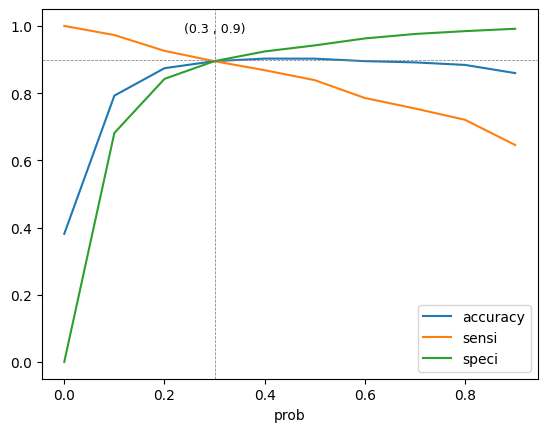

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [86]:
## Lets do mapping again using optimal cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.3 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.008546         1871                0
1          0        0.125116         6795                0
2          0        0.010201         3516                0
3          0        0.138758         8105                0
4          0        0.046897         3934                0

In [87]:
#  Calculating all metrics using confusion matrix for Train

In [88]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8951762523191095


In [89]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [90]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3583  419]
 [ 259 2207]] 

************************************************** 

True Negative                    :  3583
True Positive                    :  2207
False Negative                   :  259
False Positve                    :  419
Model Accuracy                   :  0.8952
Model Sensitivity                :  0.895
Model Specificity                :  0.8953
Model Precision                  :  0.8404
Model Recall                     :  0.895
Model True Positive Rate (TPR)   :  0.895
Model False Positive Rate (FPR)  :  0.1047


************************************************** 



#  Precision and recall tradeoff
Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [91]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

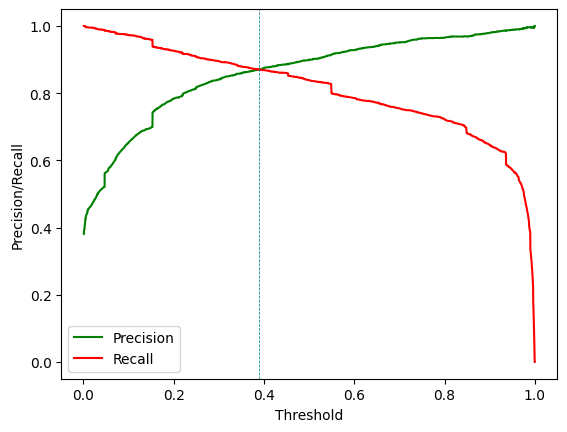

In [92]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.39, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [93]:
# copying df to test model evaluation with precision recall threshold of 0.39
y_train_precision_recall = y_train_pred_final.copy()

In [94]:
# assigning a feature for 0.39 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.39 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.008546         1871                0   
1          0        0.125116         6795                0   
2          0        0.010201         3516                0   
3          0        0.138758         8105                0   
4          0        0.046897         3934                0   

   precision_recall_prediction  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [95]:
## Lets see all matrics at 0.39 cutoff in precision-recall view and compare it with 0.3 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3682  320]
 [ 321 2145]] 

************************************************** 

True Negative                    :  3682
True Positive                    :  2145
False Negative                   :  321
False Positve                    :  320
Model Accuracy                   :  0.9009
Model Sensitivity                :  0.8698
Model Specificity                :  0.92
Model Precision                  :  0.8702
Model Recall                     :  0.8698
Model True Positive Rate (TPR)   :  0.8698
Model False Positive Rate (FPR)  :  0.08


************************************************** 



# Adding Lead Score Feature to Training dataframe
A higher score would mean that the lead is hot, i.e. is most likely to convert
Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [96]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.008546         1871                0           1
1          0        0.125116         6795                0          13
2          0        0.010201         3516                0           1
3          0        0.138758         8105                0          14
4          0        0.046897         3934                0           5

# Making Predictions on test set
 Scaling Test dataset

In [97]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Lead Import                               2772 non-null   uint8  
 7   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 8   Lead Source_Google                                    2

In [98]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols1=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols1] = scaler.transform(X_test[num_cols1])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Origin_Lead Import  Lead Source_Others  Last Activity_SMS Sent  \
4269                        0                   0                       1   
2376                        0                   0                       1   
7766                        0                   0                       0   
9199                        0                   0                       0   
4359                        0                   0                       0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Tags_Closed by Horizzon  Tags_NA  Tags_Others  \
4269                        0        1            0   
2376                        0        0            0   
7766                        0        0            0   
9199                        0        0            0   
4359                        0        0            0   

      Tags_Will revert after reading the email  Last Notable Activity_Modified  
4269                                         0                               0  
2376                                         1                               0  
7766                                         1                               0  
9199                                         0                               1  
4359                                         1                               0

#  Prediction on Test Dataset using final model

In [99]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 12)

In [100]:
# making prediction using model 4 (final model)
y_test_pred = logm5.predict(X_test_sm)

In [101]:
# top 10 columns
y_test_pred[:10]

4269    0.869901
2376    0.989963
7766    0.977984
9199    0.002345
4359    0.936033
9186    0.989744
1631    0.965691
8963    0.958316
8007    0.029732
5324    0.978282
dtype: float64

In [102]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.869901
2376  0.989963
7766  0.977984
9199  0.002345
4359  0.936033

In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [104]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.869901
1          1         2376  0.989963
2          1         7766  0.977984
3          0         9199  0.002345
4          1         4359  0.936033

In [105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.869901
1         2376          1        0.989963
2         7766          1        0.977984
3         9199          0        0.002345
4         4359          1        0.936033

In [106]:
# taking sensitivity-specificity method at 0.3 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.869901                1
1         2376          1        0.989963                1
2         7766          1        0.977984                1
3         9199          0        0.002345                0
4         4359          1        0.936033                1

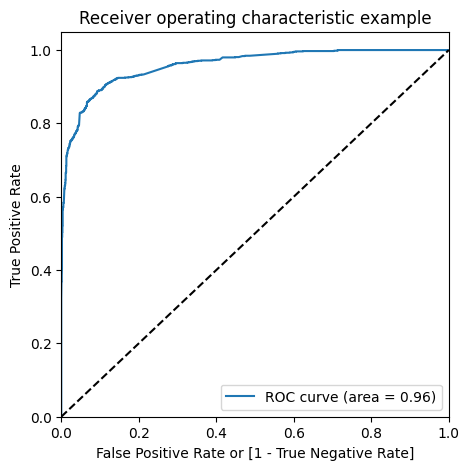

In [107]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

# Test set Model Evaluation
Calculating all metrics using confusion matrix for Test set

In [108]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1488  189]
 [ 107  988]] 

************************************************** 

True Negative                    :  1488
True Positive                    :  988
False Negative                   :  107
False Positve                    :  189
Model Accuracy                   :  0.8932
Model Sensitivity                :  0.9023
Model Specificity                :  0.8873
Model Precision                  :  0.8394
Model Recall                     :  0.9023
Model True Positive Rate (TPR)   :  0.9023
Model False Positive Rate (FPR)  :  0.1127


************************************************** 



In [109]:
# features and their coefficicent from final model
parameters=logm5.params.sort_values(ascending=False)
parameters

Tags_Closed by Horizzon                                 10.405217
Tags_Will revert after reading the email                 7.437032
Tags_Others                                              3.484836
Tags_NA                                                  3.041428
Last Activity_SMS Sent                                   1.908150
Lead Source_Others                                       1.524952
What is your current occupation_Working Professional     1.011007
Total Time Spent on Website                              0.921281
Lead Origin_Landing Page Submission                     -1.053471
Last Notable Activity_Modified                          -1.299453
Lead Origin_Lead Import                                 -2.271064
const                                                   -3.938074
dtype: float64

# Adding Lead Score Feature to Test dataframe
A higher score would mean that the lead is hot, i.e. is most likely to convert

Whereas a lower score would mean that the lead is cold and will mostly not get converted# 

In [110]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.869901                1          87
1         2376          1        0.989963                1          99
2         7766          1        0.977984                1          98
3         9199          0        0.002345                0           0
4         4359          1        0.936033                1          94

# Conclusion

<b>Train - Test<b>

<pre>
                                Train Data Set:
                                Accuracy: <font color='green'><b>90.32%</b></font>

                                Sensitivity: <font color='green'><b>84.14%</b></font>

                                Specificity: <font color='green'><b>94.12%</b></font>

                                Test Data Set:
                                Accuracy: <font color='green'><b>89.75%</b></font>

                                Sensitivity: <font color='green'><b>88.86%</b></font>

                                Specificity: <font color='green'><b>90.34%</b></font>
</pre>
